In [1]:
import numpy as np
import os, sys, time
from XFLib import *
import collections
from sklearn import decomposition
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
standard_data = np.load("top100artistgenres_or.npy").item()

In [3]:
standard_data["Blonde"]

'Pop, rock, indie, alternative'

In [4]:
list_data = list(standard_data.values())

In [5]:
labels = []
for i in list_data:
    for j in i.split(", "):
        labels.append(j)

In [6]:
labels = list(set(labels))

In [7]:
def onehot(a,l):
#     a = np.array([1, 0, 3])
    b = np.zeros((len(l),))
    b[a] = 1
    return b

In [8]:
standard_data["The_Streets"], standard_data["Lily_Allen"]

('Hip hop, UK garage, grime, electronica', 'jazz, grime')

In [9]:
artist = "Eagles"
ss = [labels.index(i) for i in standard_data[artist].split(", ")]
onehot(ss, labels)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [10]:
artist = "Oliver_Heldens"
ss = [labels.index(i) for i in standard_data[artist].split(", ")]
onehot(ss, labels)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [11]:
one_hot_artist_dict = collections.defaultdict()
for artist in standard_data:
    ss = [labels.index(i) for i in standard_data[artist].split(", ")]
    one_hot_artist_dict[artist] = onehot(ss, labels)


In [12]:
one_hot_artist_array = []
one_hot_artist_dict_keys = list(one_hot_artist_dict.keys())

for artist in one_hot_artist_dict_keys:
    one_hot_artist_array.append(one_hot_artist_dict[artist])

one_hot_artist_array = np.array(one_hot_artist_array)

In [13]:
one_hot_artist_array

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [14]:
X = one_hot_artist_array

In [15]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


In [16]:
one_hot_vec_dict = collections.defaultdict()
for i in range(len(X)):
    one_hot_vec_dict[one_hot_artist_dict_keys[i]] = X[i]

In [17]:
# one_hot_vec_dict["Eagles"], one_hot_vec_dict["Oliver_Heldens"]

Finished in 00:00:00                                                                                            


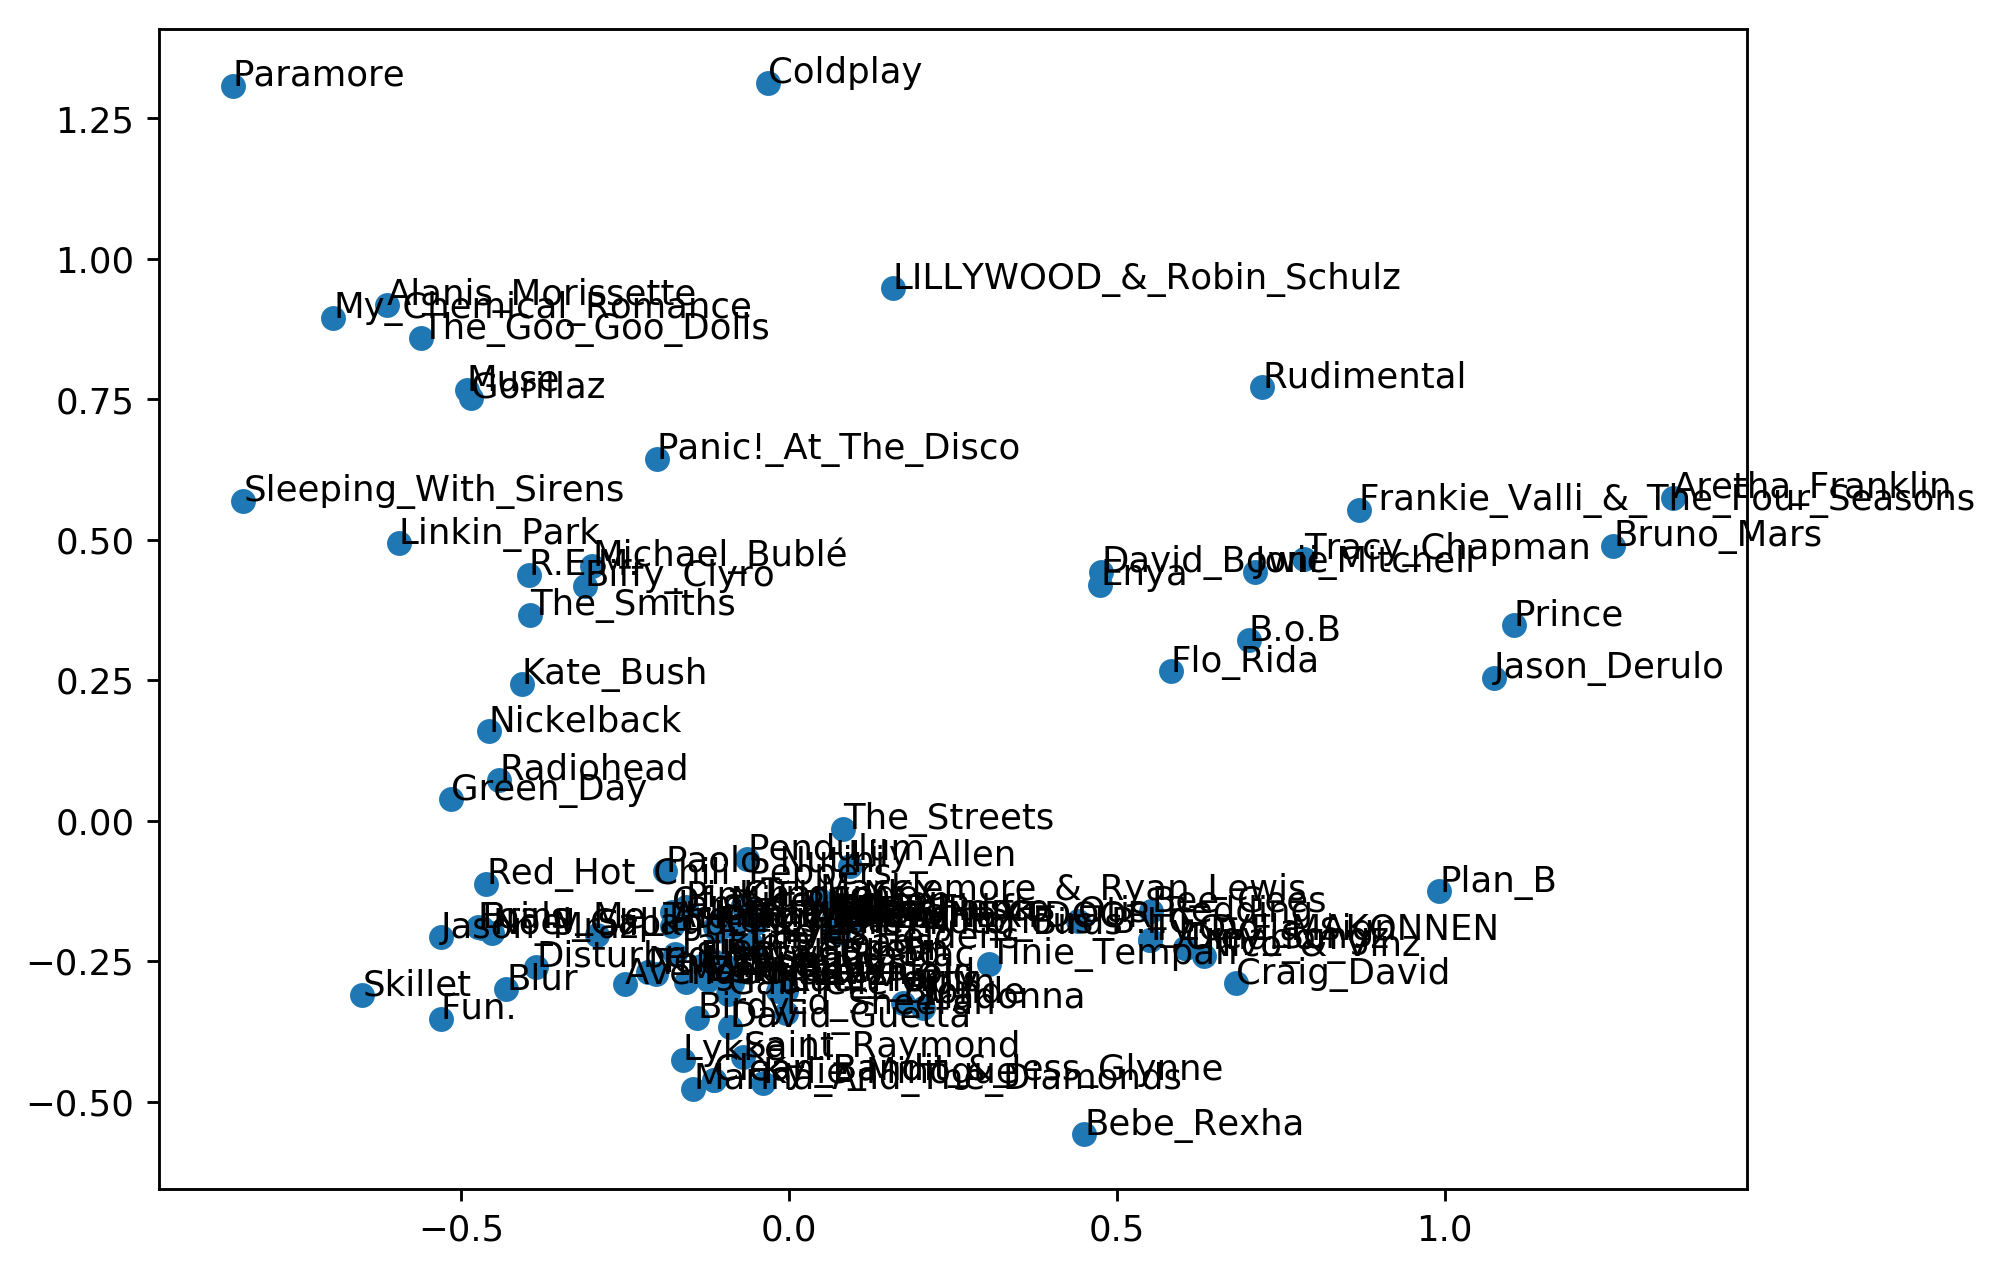

In [24]:
plt.figure(num=None, figsize=(8, 6), dpi=256, facecolor='w', edgecolor='k')
plt.scatter(X[:,0], X[:,1])
est = time_est(len(one_hot_artist_dict_keys))
for label, x,y in zip(one_hot_artist_dict_keys, X[:,0],X[:,1]):
    plt.annotate(label, xy = (x,y), xytext = (0,0),textcoords = 'offset points')
    est.check()
plt.show()

In [19]:
vector_predict_dict = collections.defaultdict()
for artist_a in one_hot_vec_dict:
    nn = []
    for artist_b in one_hot_vec_dict:
        if artist_a != artist_b:
            nn.append([sum(np.power(one_hot_vec_dict[artist_a] - one_hot_vec_dict[artist_b], 2)), artist_b])
    vector_predict_dict[artist_a.replace("_"," ")] = [i[1].replace("_"," ") for i in sorted(nn)]

In [20]:
vector_predict_dict['Linkin Park']

['R.E.M.',
 'The Smiths',
 'Sleeping With Sirens',
 'Gorillaz',
 'Muse',
 'Biffy Clyro',
 'Michael Bublé',
 'Kate Bush',
 'Nickelback',
 'The Goo Goo Dolls',
 'My Chemical Romance',
 'Panic! At The Disco',
 'Alanis Morissette',
 'Radiohead',
 'Green Day',
 'Red Hot Chili Peppers',
 'Foals',
 'Bring Me The Horizon',
 'Jason Mraz',
 "Noel Gallagher's High Flying Birds",
 'Paolo Nutini',
 'Slipknot',
 'Pendulum',
 'Of Mice & Men',
 'Pink Floyd',
 'Disturbed',
 'James Blunt',
 'Asking Alexandria',
 'Skillet',
 'Blur',
 'Sean Paul',
 'Charli XCX',
 'Klingande',
 'Iron Maiden',
 'Talking Heads',
 'Echosmith',
 'The Streets',
 'Fun.',
 'Neil Young',
 'Yann Tiersen',
 'Paramore',
 'Avenged Sevenfold',
 'The Wombats',
 'The Doors',
 'LILLYWOOD & Robin Schulz',
 'Led Zeppelin',
 'Fleetwood Mac',
 'Eagles',
 'Metronomy',
 'Lily Allen',
 'Royal Blood',
 'Oliver Heldens',
 'Vance Joy',
 'Macklemore & Ryan Lewis',
 'Damien Rice',
 'Skrillex',
 'Lupe Fiasco',
 'Wiz Khalifa',
 'Gabrielle Aplin',
 'PAR

In [21]:
np.save("matrix_eval.npy", vector_predict_dict)